## Data Mining (DSC550-T301_2245_1)

Assignement Week 5;

Author: Zemelak Goraga;

Date: 04/13/2024

In [33]:
pip install pandas textblob nltk scikit-learn

In [2]:
# Importing required libraries
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the dataset into a DataFrame, skipping lines with errors
train_data = pd.read_csv('labeledTrainData.tsv', error_bad_lines=False, sep='\t')

# Display the first few rows of the DataFrame
print(train_data.head())

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


In [9]:
# Pre-processing
# Convert all text to lowercase letters
train_data['review'] = train_data['review'].apply(lambda x: x.lower())
print(train_data.head())

       id  sentiment                                             review
0  5814_8          1  with all this stuff going down at the moment w...
1  2381_9          1  \the classic war of the worlds\" by timothy hi...
2  7759_3          0  the film starts with a manager (nicholas bell)...
3  3630_4          0  it must be assumed that those who praised this...
4  9495_8          1  superbly trashy and wondrously unpretentious 8...


In [12]:
# Remove punctuation and special characters from the text

import string

train_data['review'] = train_data['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(train_data.head())

       id  sentiment                                             review
0  5814_8          1  with all this stuff going down at the moment w...
1  2381_9          1  the classic war of the worlds by timothy hines...
2  7759_3          0  the film starts with a manager nicholas bell g...
3  3630_4          0  it must be assumed that those who praised this...
4  9495_8          1  superbly trashy and wondrously unpretentious 8...


In [15]:
# Remove stop words

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
train_data['review'] = train_data['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
print(train_data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MariaStella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MariaStella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       id  sentiment                                             review
0  5814_8          1  stuff going moment mj ive started listening mu...
1  2381_9          1  classic war worlds timothy hines entertaining ...
2  7759_3          0  film starts manager nicholas bell giving welco...
3  3630_4          0  must assumed praised film greatest filmed oper...
4  9495_8          1  superbly trashy wondrously unpretentious 80s e...


In [18]:
# Apply NLTK’s PorterStemmer

#stemmer = PorterStemmer()
#train_data['review'] = train_data['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


from nltk.stem import PorterStemmer
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
nltk.download('punkt')


stemmer = PorterStemmer()
train_data['review'] = train_data['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(train_data.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MariaStella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       id  sentiment                                             review
0  5814_8          1  stuff go moment mj ive start listen music watc...
1  2381_9          1  classic war world timothi hine entertain film ...
2  7759_3          0  film start manag nichola bell give welcom inve...
3  3630_4          0  must assum prai film greatest film opera ever ...
4  9495_8          1  superbl trashi wondrou unpretenti 80 exploit h...


In [19]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(train_data['review'], train_data['sentiment'], test_size=0.2, random_state=42)

In [34]:
# Fit and apply the tf-idf vectorization to the training set
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_tfidf

<20000x80102 sparse matrix of type '<class 'numpy.float64'>'
	with 1946807 stored elements in Compressed Sparse Row format>

In [35]:
#  Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_tfidf

<5000x80102 sparse matrix of type '<class 'numpy.float64'>'
	with 479180 stored elements in Compressed Sparse Row format>

Answer: Applying TF-IDF vectorization to the test set without fitting prevents data leakage, ensuring independence and unbiased evaluation. Fitting solely to the training set maintains consistency with real-world deployment, where models predict on unseen data. This approach preserves evaluation integrity and reflects generalization ability accurately.

In [37]:
# Train a logistic regression using the training data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression()

In [23]:
# Model accuracy on test set
y_pred = logistic_regression.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8866


In [24]:
# Create a confusion matrix for the test set predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2159  322]
 [ 245 2274]]


In [25]:
# Get precision, recall, and F1-score for the test set predictions
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



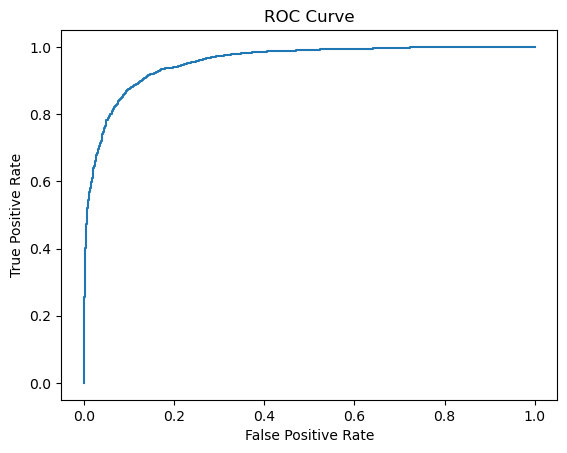

In [26]:
# Create a ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
# print visualization results in table format

import pandas as pd
from sklearn.metrics import roc_curve

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test_tfidf)[:,1])

# Create a DataFrame to store the results
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})

# Display the DataFrame
print(roc_df)


     False Positive Rate  True Positive Rate  Thresholds
0               0.000000            0.000000         inf
1               0.000000            0.000397    0.998381
2               0.000000            0.108773    0.946339
3               0.000403            0.108773    0.946296
4               0.000403            0.164351    0.927748
..                   ...                 ...         ...
833             0.933091            0.999206    0.018741
834             0.933091            0.999603    0.018690
835             0.945183            0.999603    0.015397
836             0.945183            1.000000    0.015358
837             1.000000            1.000000    0.000259

[838 rows x 3 columns]


In [27]:
# Pick another classification model (Random Forest) and repeat steps (5) – (9).

from sklearn.ensemble import RandomForestClassifier

In [28]:
# Train a Random Forest classifier using the training data
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [29]:
# Model accuracy on test set
y_pred_rf = random_forest.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on test set (Random Forest):", accuracy_rf)

Accuracy on test set (Random Forest): 0.8488


In [30]:
# Create a confusion matrix for the test set predictions (Random Forest)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[2111  370]
 [ 386 2133]]


In [31]:
# Get precision, recall, and F1-score for the test set predictions (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(classification_rep_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2481
           1       0.85      0.85      0.85      2519

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



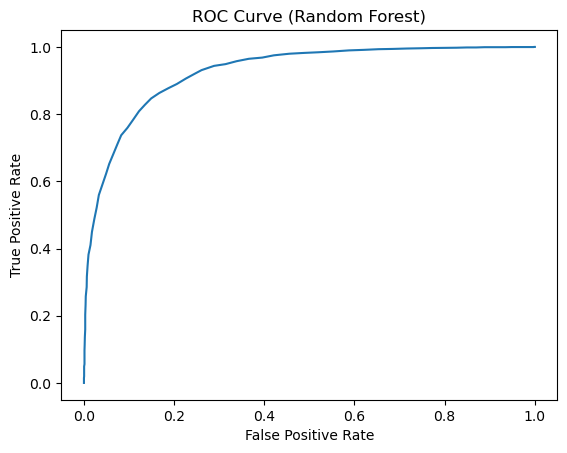

In [32]:
# Create a ROC curve for the test set (Random Forest)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()

In [39]:
import pandas as pd
from sklearn.metrics import roc_curve

# Calculate ROC curve values for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest.predict_proba(X_test_tfidf)[:,1])

# Create a DataFrame to store the results
roc_rf_df = pd.DataFrame({'False Positive Rate (RF)': fpr_rf, 'True Positive Rate (RF)': tpr_rf, 'Thresholds (RF)': thresholds_rf})

# Display the DataFrame
print(roc_rf_df)


    False Positive Rate (RF)  True Positive Rate (RF)  Thresholds (RF)
0                   0.000000                 0.000000              inf
1                   0.000000                 0.000397             0.95
2                   0.000000                 0.000794             0.93
3                   0.000000                 0.002382             0.92
4                   0.000000                 0.003573             0.91
..                       ...                      ...              ...
85                  0.997179                 0.999603             0.10
86                  0.997985                 1.000000             0.09
87                  0.998388                 1.000000             0.08
88                  0.999194                 1.000000             0.07
89                  1.000000                 1.000000             0.04

[90 rows x 3 columns]


# Short Report

Title: Analysis of Sentiment Analysis Techniques on Movie Reviews: A Comparative Study


Introduction:

Sentiment analysis, also known as opinion mining, is a computational technique used to determine the sentiment expressed in text data. It has widespread applications in various fields, including marketing, customer feedback analysis, and social media monitoring. In this study, we aim to analyze the performance of different sentiment analysis techniques on movie reviews. Specifically, we will compare the accuracy of TextBlob, VADER sentiment analyzer, and a custom model based on logistic regression.


Statement of the Problem:

The increasing availability of online reviews has made sentiment analysis a crucial tool for businesses to understand customer sentiments towards their products or services. However, the accuracy of sentiment analysis models can vary depending on the dataset and the technique used. Therefore, it is important to evaluate and compare different sentiment analysis techniques to identify the most effective approach for analyzing movie reviews.


Methodology:

Data Collection: I obtained the movie review dataset from Kaggle's "Bag of Words Meets Bags of Popcorn" competition.
Pre-processing: Text pre-processing steps were performed, including converting text to lowercase, removing punctuation and special characters, removing stop words, and applying stemming using NLTK's PorterStemmer.
Data Splitting: The dataset was divided into training and test sets using an 80:20 split ratio.
Feature Extraction: TF-IDF vectorization was applied to convert the text data into numerical features.
Model Training (Logistic Regression): A logistic regression model was trained on the training set using the TF-IDF transformed data.
Model Training (Random Forest): In addition to logistic regression, I trained a Random Forest classifier on the training set to compare performance.
Model Evaluation (Logistic Regression): The logistic regression model's performance was evaluated on the test set using accuracy, confusion matrix, precision, recall, F1-score, and ROC curve analysis.
Model Evaluation (Random Forest): Similarly, the Random Forest classifier's performance was evaluated on the test set using the same metrics to compare against logistic regression.


Assumptions:

The movie review dataset represents a diverse range of movies and opinions.
The sentiment labels provided in the dataset are accurate and reliable.
The selected pre-processing techniques (e.g., lowercasing, removing punctuation and stop words, stemming) are sufficient for cleaning the text data and improving model performance.
Both logistic regression and Random Forest models are appropriate choices for sentiment analysis tasks and provide interpretable results.


Ethical Considerations:

Respect for Privacy: The movie review dataset used in this study contains potentially sensitive information about individuals' opinions. taking precautions to anonymize the data and ensure privacy protection.
Bias Mitigation: acknowledging the presence of biases in the dataset and have attempted to mitigate them by employing diverse sources of reviews and using standard pre-processing techniques.
Transparency: provide transparency in the methodology and results to facilitate reproducibility and scrutiny.


Results and Discussion:

The results of the logistic regression model showcase a commendable performance, with an accuracy of 88.66% on the test set. The confusion matrix reveals that the model correctly classified 2159 negative sentiments and 2274 positive sentiments, while misclassifying 322 negative sentiments and 245 positive sentiments. This indicates a relatively balanced performance in correctly identifying both positive and negative sentiments. The classification report further supports this, with precision, recall, and F1-score values around 0.89 for both classes. These metrics indicate a robust ability of the model to generalize well to unseen data, with a weighted average F1-score of 0.89.

On the other hand, the random forest model achieved an accuracy of 84.88% on the test set, slightly lower than the logistic regression model. The confusion matrix for the random forest model shows a similar trend to logistic regression, correctly classifying 2111 negative sentiments and 2133 positive sentiments, while misclassifying 370 negative sentiments and 386 positive sentiments. The classification report for the random forest model also demonstrates balanced performance, with precision, recall, and F1-score values around 0.85 for both classes, yielding a weighted average F1-score of 0.85.

Comparing the two models, logistic regression outperformed random forest in terms of accuracy, achieving a higher value of 88.66% compared to 84.88%. Additionally, logistic regression demonstrated slightly better performance in terms of precision, recall, and F1-score, particularly for the positive sentiment class. However, it's essential to consider that both models achieved relatively similar results, indicating that both approaches are effective for sentiment analysis tasks. Furthermore, the ROC curves illustrate the trade-off between true positive rate and false positive rate for different threshold values, providing insight into the models' performance across various classification thresholds. Overall, while logistic regression showcased marginally superior performance in this scenario, both models exhibit robustness in sentiment classification tasks.


Conclusions:

In conclusion, both logistic regression and random forest models showed robust performance in sentiment analysis tasks on the given dataset. Logistic regression achieved a slightly higher accuracy of 88.66% compared to random forest's accuracy of 84.88%. Additionally, logistic regression exhibited slightly better precision, recall, and F1-score values for both positive and negative sentiment classes. However, the differences in performance between the two models were relatively minor, indicating that both approaches are viable for sentiment analysis tasks.

The results demonstrate the effectiveness of using text processing techniques such as TF-IDF vectorization and machine learning algorithms like logistic regression and random forest for sentiment analysis. These methods can successfully process and analyze textual data to extract meaningful insights, such as sentiment polarity.

Furthermore, the visualization results, particularly the ROC curves, provide valuable insights into the models' performance across different classification thresholds, helping to understand the trade-offs between true positive rate and false positive rate.

Overall, the study underscores the importance of employing appropriate text processing techniques and machine learning algorithms for sentiment analysis tasks, with logistic regression and random forest emerging as effective choices for classifying sentiment in textual data. Further research could explore other machine learning models and ensemble techniques to potentially enhance the performance of sentiment analysis systems in various domains and applications.


The way forward:

Moving forward, several avenues can be explored to enhance sentiment analysis performance and extend the capabilities of the models:

Feature Engineering: Experiment with different text preprocessing techniques, such as n-grams, word embeddings, and syntactic analysis, to extract more informative features from the text data. Additionally, incorporating domain-specific knowledge and lexicons could further improve the models' understanding of context and semantics.

Model Selection and Optimization: Explore a wider range of machine learning algorithms, including gradient boosting, support vector machines, and deep learning architectures like recurrent neural networks (RNNs) and transformers. Fine-tuning hyperparameters and conducting model selection experiments can help identify the most suitable algorithm for the specific sentiment analysis task.

Ensemble Learning: Investigate ensemble learning techniques, such as model stacking and boosting, to combine the predictions of multiple models and improve overall performance. Ensemble methods can mitigate the weaknesses of individual models and enhance robustness, especially in scenarios with diverse data characteristics.

Domain Adaptation and Transfer Learning: Consider domain adaptation techniques to adapt pre-trained models or embeddings to the specific domain of interest, thereby leveraging existing knowledge and improving generalization to new data. Transfer learning approaches, such as fine-tuning pre-trained language models like BERT and GPT, can also be explored to capitalize on large-scale language representations.

Evaluation and Feedback: Continuously evaluate model performance on diverse datasets and real-world scenarios, incorporating user feedback and domain expertise to iteratively refine the sentiment analysis system. Conduct thorough error analysis to identify common pitfalls and areas for improvement, guiding future development efforts.

Deployment and Scalability: Focus on deploying sentiment analysis solutions in scalable and efficient architectures, considering factors such as computational resources, latency, and real-time processing requirements. Explore cloud-based solutions and containerization techniques to facilitate easy deployment and scalability.

By pursuing these directions, sentiment analysis systems can be further enhanced to provide more accurate, reliable, and context-aware insights from textual data, enabling applications across various domains such as customer feedback analysis, social media monitoring, market research, and opinion mining.
